* Data aggregation
* How to combine data
* How to transform data
* How to clean strings with pandas
* How to handle missing and duplicate data

-----------------------------
* How can aggregating the data give us more insight into happiness scores?
* How did world happiness change from 2015 to 2017?
* Which factors contribute the most to the happiness score?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
first_5 = happiness2015.iloc[:5]
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


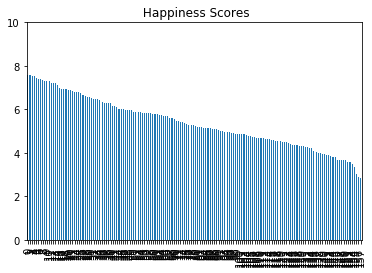

In [9]:
# Happiness score of each country in happiness2015
happiness2015['Happiness Score'].plot(kind = 'bar', title = ' Happiness Scores', ylim = (0,10))
plt.show()

In [10]:
happiness2015.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

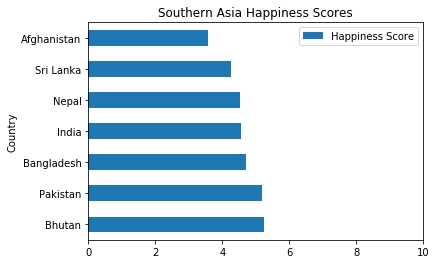

In [12]:
so_asia = happiness2015[happiness2015.Region == 'Southern Asia']
so_asia.plot(x = 'Country', y = 'Happiness Score', kind = 'barh', title = 'Southern Asia Happiness Scores',
            xlim = (0,10))

In [14]:
mean_happiness = happiness2015.groupby('Region').mean()

In [17]:
type(happiness2015.Region.unique())

numpy.ndarray

### Split --> Apply --> Combine

In [20]:
grouped = happiness2015.groupby('Region')
north_am = grouped.get_group('North America')
north_am

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [23]:
grouped.groups
#Index for each group

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [24]:
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
north_america == na_group

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [28]:
grouped.size() # Obtain the size of each region group
grouped.mean()
grouped.sum()
grouped.count()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,2,2,2,2,2,2,2,2,2,2,2
Central and Eastern Europe,29,29,29,29,29,29,29,29,29,29,29
Eastern Asia,6,6,6,6,6,6,6,6,6,6,6
Latin America and Caribbean,22,22,22,22,22,22,22,22,22,22,22
Middle East and Northern Africa,20,20,20,20,20,20,20,20,20,20,20
North America,2,2,2,2,2,2,2,2,2,2,2
Southeastern Asia,9,9,9,9,9,9,9,9,9,9,9
Southern Asia,7,7,7,7,7,7,7,7,7,7,7
Sub-Saharan Africa,40,40,40,40,40,40,40,40,40,40,40


In [30]:
grouped['Happiness Score'].mean()
# GroupBy.agg([func_name1, func_name2, func_name3])

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [31]:
import numpy as np

In [32]:
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])

In [33]:
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [34]:
type(happy_mean_max)

pandas.core.frame.DataFrame

In [35]:
def dif(group):
    return group.max() - group.mean()

In [38]:
mean_max_dif = happy_grouped.agg(dif)

In [39]:
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [40]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [41]:
happiness2015.pivot_table(values = 'Happiness Score', index = 'Region', aggfunc=np.mean)
# Use pivot_table, return a DataFrame

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


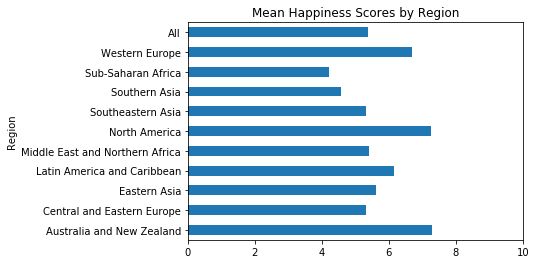

In [47]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc = np.mean, margins =True)
#If margins = True, All will be added to the index of the resulting dataframe and the corresponding value
# will be the result of applying the aggregation method to the entire column
pv_happiness.plot(kind = 'barh', title = 'Mean Happiness Scores by Region', xlim = (0,10), legend = False)

In [44]:
world_mean_happiness = happiness2015['Happiness Score'].mean()

In [48]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [49]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min, np.max], margins = True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [50]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
happy_family_stats

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [51]:
pv_happy_family_stats = happiness2015.pivot_table(['Family', 'Happiness Score'], 'Region', 
                                                  aggfunc = [np.min, np.max, np.mean],
                                                  margins = True)
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

In [58]:
happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.max, 
                                                       lambda group:group.max() - group.mean()])

,mean,amax,<lambda_0>
Region,,,
Australia and New Zealand,7.285000,7.286,0.001000
Central and Eastern Europe,5.332931,6.505,1.172069
Eastern Asia,5.626167,6.298,0.671833
Latin America and Caribbean,6.144682,7.226,1.081318
Middle East and Northern Africa,5.406900,7.278,1.871100
North America,7.273000,7.427,0.154000
Southeastern Asia,5.317444,6.798,1.480556
Southern Asia,4.580857,5.253,0.672143
Sub-Saharan Africa,4.202800,5.477,1.274200


In [61]:
happiness2015.pivot_table(['Family', 'Happiness Score'], index = 'Region', aggfunc=[np.mean, np.max], margins = True)

mean                     amax  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.31967   
Central and Eastern Europe       1.053042        5.332931  1.34043   
Eastern Asia                     1.099427        5.626167  1.30060   
Latin America and Caribbean      1.104720        6.144682  1.30477   
Middle East and Northern Africa  0.920490        5.406900  1.22393   
North America                    1.284860        7.273000  1.32261   
Southeastern Asia                0.940468        5.317444  1.26504   
Southern Asia                    0.645321        4.580857  1.10395   
Sub-Saharan Africa               0.809085        4.202800  1.18468   
Western Europe                   1.247302        6.689619  1.40223   
All                              0.991046        5.375734  1.40223   

                                                 
                                Happiness Score  
Region                                           
Australia and New Zealand                 7.286  
Central and Eastern Europe                6.505  
Eastern Asia                              6.298  
Latin America and Caribbean               7.226  
Middle East and Northern Africa           7.278  
North America                             7.427  
Southeastern Asia                         6.798  
Southern Asia                             5.253  
Sub-Saharan Africa                        5.477  
Western Europe                            7.587  
All                                       7.587

### Combining Data with Pandas

In [64]:
happiness2016 = pd.read_csv('World_Happiness_2016.csv')
happiness2017 = pd.read_csv('World_Happiness_2017.csv')
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [65]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


#### pd.concat
* Stacked: Axis = 0, default
* Side by Side, Axis = 1

In [66]:
head_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].head(3)

In [67]:
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [68]:
head_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [69]:
concat_axis0 = pd.concat([head_2015, head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)
print(concat_axis0)
print(concat_axis1)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016
       Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016


In [70]:
concat_axis0.shape

(6, 3)

In [74]:
head_2015 = happiness2015[['Year', 'Country', 'Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].head(3)
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [76]:
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [77]:
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [79]:
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)
concat_axis1

,Year,Country,Happiness Score,Standard Error,Country,Happiness Score,Year
0,2015,Switzerland,7.587,0.03411,Denmark,7.526,2016.0
1,2015,Iceland,7.561,0.04884,Switzerland,7.509,2016.0
2,2015,Denmark,7.527,0.03328,Iceland,7.501,2016.0
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


In [80]:
concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


#### pd.merge()
* merge function only combines dataframes horizontally (axis = 1) and can only combine two dataframe at a time.
* It can be valuable when we need to combine very large dataframes quickly and provides more flexibility  in terms of how data can be combined.

In [81]:
three_2015 = happiness2015[['Country', 'Happiness Rank', 'Year']].iloc[2:5]
three_2016 = happiness2016[['Country', 'Happiness Rank', 'Year']].iloc[2:5]
merged = pd.merge(left = three_2015, right = three_2016, on = 'Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016




There are actually four different types of joins:

    Inner: only includes elements that appear in both dataframes with a common key
    Outer: includes all data from both dataframes
    Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
    Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes


In [83]:
merged_left = pd.merge(left = three_2015, right = three_2016, on = 'Country', how = 'left')
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [84]:
pd.merge(left = three_2016, right = three_2015, on = 'Country', how = 'left')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [86]:
merged_suffixes = pd.merge(left = three_2015, right = three_2016, suffixes=('_2015', '_2016'), 
                          how = 'left', on = 'Country')
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [88]:
merged_updated_suffixes = pd.merge(left = three_2016, right = three_2015, suffixes=('_2016', '_2015'),
                                  how = 'left', on = 'Country')
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [89]:
four_2015 = happiness2015[['Country', 'Happiness Rank', 'Year']].iloc[2:6]

In [90]:
pd.merge(left = four_2015, right = three_2016, left_index = True, right_index=True, suffixes = ('_2015', '_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [91]:
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [92]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [93]:
merge_index_left = pd.merge(left = four_2015, right = three_2016, left_index = True, right_index=True,
                           how = 'left', suffixes=('_2015', '_2016'))
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


 	pd.concat() 	pd.merge()
Default Join Type 	Outer 	Inner
Can Combine More Than Two Dataframes at a Time? 	Yes 	No
Can Combine Dataframes Vertically
(axis=0) or Horizontally (axis=1)?
	Both 	Horizontally
Syntax 	Concat (Vertically)
concat([df1,df2,df3])

Concat (Horizontally)
concat([df1,df2,df3], axis = 1)



	Merge (Join on Columns)
merge(left = df1, right = df2, how = 'join_type', on = 'Col')

Merge (Join on Index)
merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)




In [94]:
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


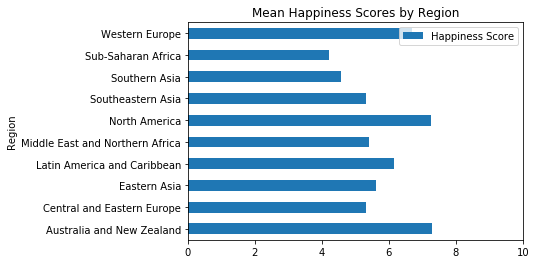

In [95]:
means.plot(kind = 'barh', title = 'Mean Happiness Scores by Region', xlim = (0,10))

In [96]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [98]:
happiness2017.rename(columns={'Hapiness Score': 'Happiness Score'}, inplace = True)
happiness2017.head()

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [99]:
combined = pd.concat([happiness2015, happiness2016, happiness2017])
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year', aggfunc = np.mean)
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


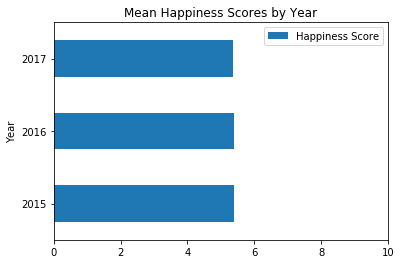

In [100]:
pivot_table_combined.plot(kind = 'barh', title = 'Mean Happiness Scores by Year', xlim = (0,10))

* Mean world happiness score stayed approximately the same from 2015 to 2017

## Transforming Data with Pandas
- Which of the factor contribute the most to the happiness score?

In [101]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [102]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }
happiness2015.rename(mapping, axis = 1, inplace = True)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [103]:
# Series.map
# Series.apply
def label(element):
    if element > 1:
        return 'High'
    return 'Low'
economy_impact_map = happiness2015.Economy.map(label)
economy_impact_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [104]:
economy_impact_apply = happiness2015.Economy.apply(label)
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [105]:
equal = economy_impact_map.equals(economy_impact_apply)
equal

True

In [106]:
economy_impact_map == economy_impact_apply

0      True
1      True
2      True
3      True
4      True
       ... 
153    True
154    True
155    True
156    True
157    True
Name: Economy, Length: 158, dtype: bool

In [109]:
def label(element, x):
    if element > x:
        return 'High'
    return 'Low'
economy_impact_apply = happiness2015.Economy.apply(label, x = .8)

In [110]:
def label(element):
    if element > 1:
        return 'High'
    return 'Low'
happiness2015['Economy Impact'] = happiness2015.Economy.map(label)
happiness2015['Health Impact'] = happiness2015.Health.apply(label)
happiness2015['Family Impact'] = happiness2015.Family.apply(label)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,Health Impact,Family Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High,Low,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High,Low,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,High,Low,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,High,Low,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,High,Low,High


In [112]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact.head()
#df.applymap(func) 

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [113]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [114]:
factors_impact.applymap(pd.value_counts) # Make no sense

,Economy,Family,Health,Freedom,Trust,Generosity
0,High 4 dtype: int64,High 4 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
1,High 4 dtype: int64,High 4 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
2,High 4 dtype: int64,High 4 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
3,High 4 dtype: int64,High 4 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
4,High 4 dtype: int64,High 4 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
...,...,...,...,...,...,...
153,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
154,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
155,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64
156,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64,Low 3 dtype: int64


* apply() if applied to df, not element-wise, instead column-wise or row-wise
* df.apply(), set up to accept a series, most commonly a column
* df.applymap() is element-wise

In [127]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num / den
v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct.head()

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


When we use the apply() method, we're actually looping through rows, not vectorization

In [128]:
happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis = 1)

0      7.58696
1      7.56092
2      7.52708
3      7.52222
4      7.42694
        ...   
153    3.46504
154    3.34009
155    3.00629
156    2.90454
157    2.83897
Length: 158, dtype: float64

* Uset the df.apply() method to convert each of the values in the six factor columns and the Dystopia Residual column to percentages

In [129]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
def percentages(col):
    div = col / happiness2015['Happiness Score']
    return div * 100
factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


In [130]:
factor_percentages[factors].sum(axis = 1).head()

0     99.999473
1     99.998942
2    100.001063
3    100.002925
4     99.999192
dtype: float64

In [131]:
happy_two = happiness2015[['Country', 'Happiness Score', 'Economy', 'Family', 'Health']].iloc[:2]
happy_two

,Country,Happiness Score,Economy,Family,Health
0,Switzerland,7.587,1.39651,1.34951,0.94143
1,Iceland,7.561,1.30232,1.40223,0.94784


In [132]:
pd.melt(happy_two, id_vars = ['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


In [133]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars=factors)

In [136]:
# Convert the value column to a percentage
melt['Percentage'] = round(melt.value / melt['Happiness Score'] * 100, 2)
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


The melt function moved the values in the seven columns - Economy, Health, Family, Freedom, Generosity, Trust, and Dystopia Residual - to the same column, which meant we could transform them all at once. 
* Tidy data

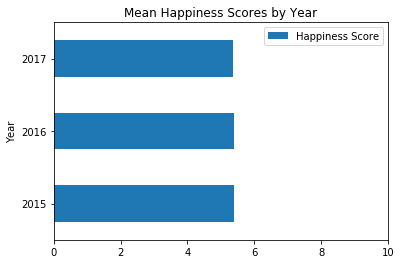

In [137]:
# Concatenate 2015, 2016, 2017 data
combined = pd.concat([happiness2015, happiness2016, happiness2017])
#Create a pivot table listing the mean happiness score for each year. The default aggreagtion function is the mean
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

# Plot the pivot table
pivot_table_combined.plot(kind = 'barh', title = 'Mean Happiness Scores by Year', xlim = (0,10))

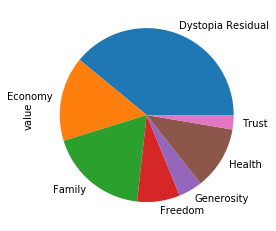

In [138]:
pv_melt = melt.pivot_table(index = 'variable', values = 'value')
pv_melt.plot(kind = 'pie', y = 'value', legend = False)


In [139]:
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


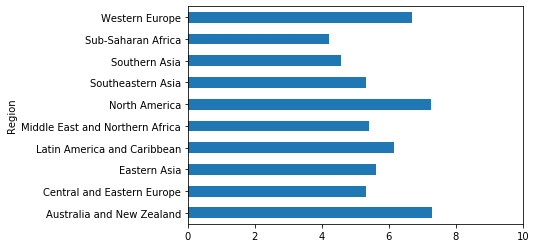

In [148]:
happiness2015.groupby('Region')['Happiness Score'].agg(np.mean).plot(kind = 'barh', xlim = (0,10))

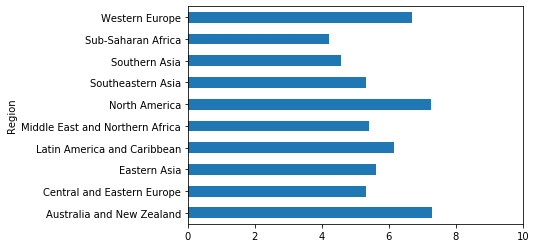

In [146]:
happiness2015.pivot_table(index = 'Region', values='Happiness Score').plot(kind = 'barh', xlim = (0,10), 
                                                                          legend = False)